# Exploratory Data Analysis & Data Storytelling

In this notebook we
1. Load '../Data/tweets_cleansed.csv' which is the output of data wrangling.
2. Ask & answer questions one by one.
3. Come to a conclusion and/or insights about sentiment analysis on movie reviews with tweets in the end.

### Import Packages

In [1]:
import pandas as pd
import numpy as np
from collections import Counter

from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer

import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_colwidth = 500

sns.set()
sns.set_style("whitegrid")
palette = sns.diverging_palette(220, 20, sep = 20, n = 150)
sns.set_palette(palette)

### Load Data

In [2]:
df = pd.read_csv('../Data/tweets_cleansed.csv')
df.head(20)

,Tweets
0,I think there’s a first date going on near me and it’s a disaster:“You know Harry Potter?”“Not really.”“The movies?”“No.”“I’m a Hufflepuff.”“Congrats?”GET OUT OF THERE SWEET HUFFLEPUFF.
1,Sell all your houses. Stop flying private jets. Do movies for free. And give away your cash to the IRS - then we’ll talk
2,Starship Troopers (1997) is a deliciously ambiguous movie:liberal viewers think it's a hilarious satire of toxic masculinity & militarism;conservatives think it's a savage space-war parable with Red Pill dog-whistles.What other movies have this 'political Necker cube' quality?
3,Then this & they never ran. I felt like I was in a @Disney movie & they were letting me know my dog Diesel was in a better place.
4,Best Gary Oldman movie? (Pt. 2)
5,Find out how an unexpected practical effect brought the world of #Solo: A #StarWars Story to life. Enjoy the film digitally in HD and 4K Ultra HD and Movies Anywhere on September 14 and on Blu-ray on September 25.
6,"fauni just called me from jail and then he passed the phone to lil wop like ""aye this white boy adam wanna talk to you"". also fauni wants the people to know he's trying to get out in time to see the Predator movie"
7,Jamie Dornan and Matt Bomer both stopped by a lounge at #TIFF to promote their new movies this afternoon!
8,"Just saw that a Russian/South Korean team of scientist are creating a cloning lab where they will attempt to recreate Jurassic era animals with DNA found from long extinct creatures in the permafrost. Didn't they make a movie about this? Everything worked out in that, right?"
9,"My brother, Benjamin Rice, engineered and co-produced all of the music and vocals for this movie .... I’m blown away by these songs. So proud of him. Just pre-ordered the album on iTunes. Go get ittt #AStarIsBorn"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15001 entries, 0 to 15000
Data columns (total 1 columns):
Tweets    15001 non-null object
dtypes: object(1)
memory usage: 117.3+ KB


## Top Questions:
1. How to identify useful tweets?
2. With all the useful tweets, which movie occurs most?
3. Usually how many tokens are there in a tweets?

### Questions 1: How to identify useful tweets?

In [4]:
# Reuse the keywords that we used to search tweets.
predefined_movies = [
    'adrift', \
    'bookclub', \
    'book club', \
    'thehappyprince', \
    'the happy prince', \
    'oceans8', \
    'oceans 8', \
    'inthefade', \
    'in the fade', \
    'crazyrichasians', \
    'crazy rich asians', \
    'jurassicworld', \
    'jurassic world', \
    'missionimpossible', \
    'mission impossible', \
    'americananimals', \
    'american animals', \
    'incredibles2', \
    'incredibles 2', \
    'mammamia']

predefined_movies_2_movie_map = {
    'adrift' : 'adrift', \
    'bookclub' : 'bookclub', \
    'book club' : 'bookclub', \
    'thehappyprince' : 'thehappyprince', \
    'the happy prince' : 'thehappyprince', \
    'oceans8' : 'oceans8', \
    'oceans 8' : 'oceans8', \
    'inthefade' : 'inthefade', \
    'in the fade' : 'inthefade', \
    'crazyrichasians' : 'crazyrichasians', \
    'crazy rich asians' : 'crazyrichasians', \
    'jurassicworld' : 'jurassicworld', \
    'jurassic world' : 'jurassicworld', \
    'missionimpossible' : 'missionimpossible', \
    'mission impossible' : 'missionimpossible', \
    'americananimals' : 'americananimals', \
    'american animals' : 'americananimals', \
    'incredibles2' : 'incredibles2', \
    'incredibles 2' : 'incredibles2', \
    'mammamia' : 'mammamia', \
    'mamma mia' : 'mammamia'
}

In [5]:
# Confirm if the tweets contain these keywords
def has_movie(tweets):
    found_tokens = []
    for movie in predefined_movies:
        if movie in tweets.lower():
            found_tokens.append(predefined_movies_2_movie_map[movie])
    return np.nan if found_tokens == [] else list(set(found_tokens))

df['Has_predefined_movies'] = df['Tweets'].apply(has_movie)

In [6]:
df.head(200)

,Tweets,Has_predefined_movies
0,I think there’s a first date going on near me and it’s a disaster:“You know Harry Potter?”“Not really.”“The movies?”“No.”“I’m a Hufflepuff.”“Congrats?”GET OUT OF THERE SWEET HUFFLEPUFF.,NaN
1,Sell all your houses. Stop flying private jets. Do movies for free. And give away your cash to the IRS - then we’ll talk,NaN
2,Starship Troopers (1997) is a deliciously ambiguous movie:liberal viewers think it's a hilarious satire of toxic masculinity & militarism;conservatives think it's a savage space-war parable with Red Pill dog-whistles.What other movies have this 'political Necker cube' quality?,NaN
3,Then this & they never ran. I felt like I was in a @Disney movie & they were letting me know my dog Diesel was in a better place.,NaN
4,Best Gary Oldman movie? (Pt. 2),NaN
5,Find out how an unexpected practical effect brought the world of #Solo: A #StarWars Story to life. Enjoy the film digitally in HD and 4K Ultra HD and Movies Anywhere on September 14 and on Blu-ray on September 25.,NaN
6,"fauni just called me from jail and then he passed the phone to lil wop like ""aye this white boy adam wanna talk to you"". also fauni wants the people to know he's trying to get out in time to see the Predator movie",NaN
7,Jamie Dornan and Matt Bomer both stopped by a lounge at #TIFF to promote their new movies this afternoon!,NaN
8,"Just saw that a Russian/South Korean team of scientist are creating a cloning lab where they will attempt to recreate Jurassic era animals with DNA found from long extinct creatures in the permafrost. Didn't they make a movie about this? Everything worked out in that, right?",NaN
9,"My brother, Benjamin Rice, engineered and co-produced all of the music and vocals for this movie .... I’m blown away by these songs. So proud of him. Just pre-ordered the album on iTunes. Go get ittt #AStarIsBorn",NaN


In [7]:
# Let's tokenize the tweets first.
df['Tweets_tokens'] = df['Tweets'].apply(word_tokenize)

In [8]:
df.head(20)

,Tweets,Has_predefined_movies,Tweets_tokens
0,I think there’s a first date going on near me and it’s a disaster:“You know Harry Potter?”“Not really.”“The movies?”“No.”“I’m a Hufflepuff.”“Congrats?”GET OUT OF THERE SWEET HUFFLEPUFF.,NaN,"[I, think, there, ’, s, a, first, date, going, on, near, me, and, it, ’, s, a, disaster, :, “, You, know, Harry, Potter, ?, ”, “, Not, really., ”, “, The, movies, ?, ”, “, No., ”, “, I, ’, m, a, Hufflepuff., ”, “, Congrats, ?, ”, GET, OUT, OF, THERE, SWEET, HUFFLEPUFF, .]"
1,Sell all your houses. Stop flying private jets. Do movies for free. And give away your cash to the IRS - then we’ll talk,NaN,"[Sell, all, your, houses, ., Stop, flying, private, jets, ., Do, movies, for, free, ., And, give, away, your, cash, to, the, IRS, -, then, we, ’, ll, talk]"
2,Starship Troopers (1997) is a deliciously ambiguous movie:liberal viewers think it's a hilarious satire of toxic masculinity & militarism;conservatives think it's a savage space-war parable with Red Pill dog-whistles.What other movies have this 'political Necker cube' quality?,NaN,"[Starship, Troopers, (, 1997, ), is, a, deliciously, ambiguous, movie, :, liberal, viewers, think, it, 's, a, hilarious, satire, of, toxic, masculinity, &, militarism, ;, conservatives, think, it, 's, a, savage, space-war, parable, with, Red, Pill, dog-whistles.What, other, movies, have, this, 'political, Necker, cube, ', quality, ?]"
3,Then this & they never ran. I felt like I was in a @Disney movie & they were letting me know my dog Diesel was in a better place.,NaN,"[Then, this, &, they, never, ran, ., I, felt, like, I, was, in, a, @, Disney, movie, &, they, were, letting, me, know, my, dog, Diesel, was, in, a, better, place, .]"
4,Best Gary Oldman movie? (Pt. 2),NaN,"[Best, Gary, Oldman, movie, ?, (, Pt, ., 2, )]"
5,Find out how an unexpected practical effect brought the world of #Solo: A #StarWars Story to life. Enjoy the film digitally in HD and 4K Ultra HD and Movies Anywhere on September 14 and on Blu-ray on September 25.,NaN,"[Find, out, how, an, unexpected, practical, effect, brought, the, world, of, #, Solo, :, A, #, StarWars, Story, to, life, ., Enjoy, the, film, digitally, in, HD, and, 4K, Ultra, HD, and, Movies, Anywhere, on, September, 14, and, on, Blu-ray, on, September, 25, .]"
6,"fauni just called me from jail and then he passed the phone to lil wop like ""aye this white boy adam wanna talk to you"". also fauni wants the people to know he's trying to get out in time to see the Predator movie",NaN,"[fauni, just, called, me, from, jail, and, then, he, passed, the, phone, to, lil, wop, like, ``, aye, this, white, boy, adam, wan, na, talk, to, you, '', ., also, fauni, wants, the, people, to, know, he, 's, trying, to, get, out, in, time, to, see, the, Predator, movie]"
7,Jamie Dornan and Matt Bomer both stopped by a lounge at #TIFF to promote their new movies this afternoon!,NaN,"[Jamie, Dornan, and, Matt, Bomer, both, stopped, by, a, lounge, at, #, TIFF, to, promote, their, new, movies, this, afternoon, !]"
8,"Just saw that a Russian/South Korean team of scientist are creating a cloning lab where they will attempt to recreate Jurassic era animals with DNA found from long extinct creatures in the permafrost. Didn't they make a movie about this? Everything worked out in that, right?",NaN,"[Just, saw, that, a, Russian/South, Korean, team, of, scientist, are, creating, a, cloning, lab, where, they, will, attempt, to, recreate, Jurassic, era, animals, with, DNA, found, from, long, extinct, creatures, in, the, permafrost, ., Did, n't, they, make, a, movie, about, this, ?, Everything, worked, out, in, that, ,, right, ?]"
9,"My brother, Benjamin Rice, engineered and co-produced all of the music and vocals for this movie .... I’m blown away by these songs. So proud of him. Just pre-ordered the album on iTunes. Go get ittt #AStarIsBorn",NaN,"[My, brother, ,, Benjamin, Rice, ,, engineered, and, co-produced, all, of, the, music, and, vocals, for, this, movie, ..., 

In [9]:
# Drop data points that are NOT really useful to us.
df = df.dropna()
df.head(200)

,Tweets,Has_predefined_movies,Tweets_tokens
299,Come. To. Mama. Own #Oceans8 on Blu-ray™ tomorrow.,[oceans8],"[Come, ., To, ., Mama, ., Own, #, Oceans8, on, Blu-ray™, tomorrow, .]"
354,A true story heist movie about dumb guys who watched too many heist movies. A really good movie. Recommended. American Animals. 7.8 / 10@FilmCerita @CenayangFilm,[americananimals],"[A, true, story, heist, movie, about, dumb, guys, who, watched, too, many, heist, movies, ., A, really, good, movie, ., Recommended, ., American, Animals, ., 7.8, /, 10, @, FilmCerita, @, CenayangFilm]"
542,#NowWatching 2018 movie no.81: #AmericanAnimalsSeen it? Leave a #review to be read on the #podcast!Past eps:#FilmTwitter #PodernFamily #ThePWA #PodSociety #MovieReview,[americananimals],"[#, NowWatching, 2018, movie, no.81, :, #, AmericanAnimalsSeen, it, ?, Leave, a, #, review, to, be, read, on, the, #, podcast, !, Past, eps, :, #, FilmTwitter, #, PodernFamily, #, ThePWA, #, PodSociety, #, MovieReview]"
576,My ranking of the Jurassic Park/World movies:1: All of them because I am a Jurassic fan and I'm not petty. They're movies people. #JurassicWorld #JurassicPark,[jurassicworld],"[My, ranking, of, the, Jurassic, Park/World, movies:1, :, All, of, them, because, I, am, a, Jurassic, fan, and, I, 'm, not, petty, ., They, 're, movies, people, ., #, JurassicWorld, #, JurassicPark]"
686,crazy rich asians:— asian rep — AMAZING love story— HILARIOUS— moving— has gemma chan & constance wu— great soundtrack— a cute and lovely movie— nick young and rachel chu— astrid leongsierra burgess: is a loser,[crazyrichasians],"[crazy, rich, asians, :, —, asian, rep, —, AMAZING, love, story—, HILARIOUS—, moving—, has, gemma, chan, &, constance, wu—, great, soundtrack—, a, cute, and, lovely, movie—, nick, young, and, rachel, chu—, astrid, leongsierra, burgess, :, is, a, loser]"
996,#CrazyRichAsians is pure joy! Take your friends and family and see it again: …,[crazyrichasians],"[#, CrazyRichAsians, is, pure, joy, !, Take, your, friends, and, family, and, see, it, again, :, …]"
1242,Seeing #CrazyRichAsians again with the BFF this weekend like…,[crazyrichasians],"[Seeing, #, CrazyRichAsians, again, with, the, BFF, this, weekend, like…]"
1297,"Just finished this Jurassic Park series poster! JP has been my favorite movie since I was just 7 years old, so this has been a long time coming!#JurassicPark #JurassicWorld #JP25",[jurassicworld],"[Just, finished, this, Jurassic, Park, series, poster, !, JP, has, been, my, favorite, movie, since, I, was, just, 7, years, old, ,, so, this, has, been, a, long, time, coming, !, #, JurassicPark, #, JurassicWorld, #, JP25]"
1341,"Game on!Vote for #Oceans8 for #TheMovie of 2018, #TheActionMovie of 2018 and Sandra Bullock & Anne Hathaway for #TheFemaleMovieStar of 2018 on #PCAs @peopleschoice",[oceans8],"[Game, on, !, Vote, for, #, Oceans8, for, #, TheMovie, of, 2018, ,, #, TheActionMovie, of, 2018, and, Sandra, Bullock, &, Anne, Hathaway, for, #, TheFemaleMovieStar, of, 2018, on, #, PCAs, @, peopleschoice]"
1349,Don’t miss the movie that is capturing the world! #CrazyRichAsians is now playing only in theaters: …,[crazyrichasians],"[Don, ’, t, miss, the, movie, that, is, capturing, the, world, !, #, CrazyRichAsians, is, now, playing, only, in, theaters, :, …]"


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7824 entries, 299 to 14959
Data columns (total 3 columns):
Tweets                   7824 non-null object
Has_predefined_movies    7824 non-null object
Tweets_tokens            7824 non-null object
dtypes: object(3)
memory usage: 244.5+ KB


** Found 7824 useful tweets w/ predefined keywords.**

### Questions 2: With all the useful tweets, which movie occurs most?

In [11]:
from collections import defaultdict

def count_movie_occurrences():
    cntMap = defaultdict(int)
    
    for movies in list(df['Has_predefined_movies']):
        for movie in movies:
            cntMap[movie] += 1
            
    return cntMap
        
cntMap = count_movie_occurrences()

cnt_df = pd.DataFrame({'Movies' : list(cntMap.keys()), 'Count' : list(cntMap.values())})
cnt_df = cnt_df[['Movies', 'Count']]
cnt_df.head(20)

,Movies,Count
0,oceans8,997
1,americananimals,423
2,jurassicworld,2047
3,crazyrichasians,1849
4,missionimpossible,380
5,incredibles2,1596
6,adrift,64
7,bookclub,657
8,thehappyprince,17
9,mammamia,113


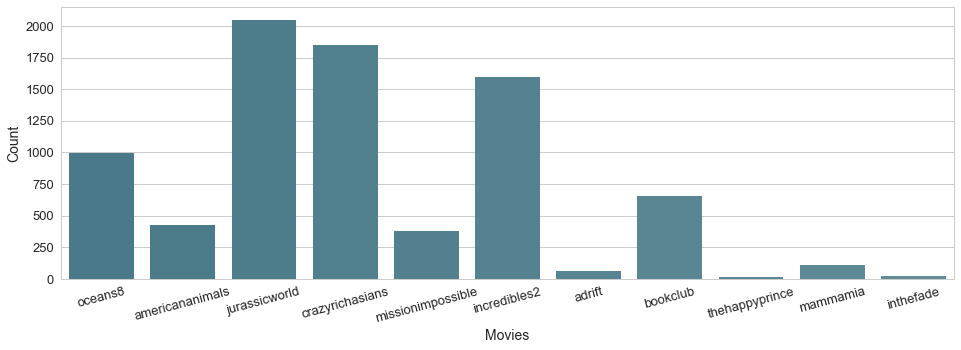

In [12]:
def get_sub_plot(width = 16, height = 5, label_font_size = 14, tick_font_size = 13):
    fig, ax = plt.subplots()
    fig.set_size_inches(width, height)
    ax.tick_params(labelsize = tick_font_size)
    ax.set_xlabel(ax.get_xlabel(), fontsize = label_font_size)
    ax.set_ylabel(ax.get_ylabel(), fontsize = label_font_size)
    return ax

def plot_bar_plot(x, y, df):
    ax = get_sub_plot()
    sns.barplot(x = 'Movies', y = 'Count', data = cnt_df, ax = ax)
    plt.xticks(rotation = 15)
    plt.show()
    
plot_bar_plot('Movies', 'Count', cnt_df)

**Jurassic World occurs most. Crazy Rich Asians also occurs a lot.**

### Questions 3: Usually how many tokens are there in a tweets?

In [13]:
# Let's tokenize the tweets first.
df['Tweets_tokens'] = df['Tweets'].apply(word_tokenize)
df['Tweets_tokens_len'] = df['Tweets_tokens'].apply(len)
df.head()

,Tweets,Has_predefined_movies,Tweets_tokens,Tweets_tokens_len
299,Come. To. Mama. Own #Oceans8 on Blu-ray™ tomorrow.,[oceans8],"[Come, ., To, ., Mama, ., Own, #, Oceans8, on, Blu-ray™, tomorrow, .]",13
354,A true story heist movie about dumb guys who watched too many heist movies. A really good movie. Recommended. American Animals. 7.8 / 10@FilmCerita @CenayangFilm,[americananimals],"[A, true, story, heist, movie, about, dumb, guys, who, watched, too, many, heist, movies, ., A, really, good, movie, ., Recommended, ., American, Animals, ., 7.8, /, 10, @, FilmCerita, @, CenayangFilm]",32
542,#NowWatching 2018 movie no.81: #AmericanAnimalsSeen it? Leave a #review to be read on the #podcast!Past eps:#FilmTwitter #PodernFamily #ThePWA #PodSociety #MovieReview,[americananimals],"[#, NowWatching, 2018, movie, no.81, :, #, AmericanAnimalsSeen, it, ?, Leave, a, #, review, to, be, read, on, the, #, podcast, !, Past, eps, :, #, FilmTwitter, #, PodernFamily, #, ThePWA, #, PodSociety, #, MovieReview]",35
576,My ranking of the Jurassic Park/World movies:1: All of them because I am a Jurassic fan and I'm not petty. They're movies people. #JurassicWorld #JurassicPark,[jurassicworld],"[My, ranking, of, the, Jurassic, Park/World, movies:1, :, All, of, them, because, I, am, a, Jurassic, fan, and, I, 'm, not, petty, ., They, 're, movies, people, ., #, JurassicWorld, #, JurassicPark]",32
686,crazy rich asians:— asian rep — AMAZING love story— HILARIOUS— moving— has gemma chan & constance wu— great soundtrack— a cute and lovely movie— nick young and rachel chu— astrid leongsierra burgess: is a loser,[crazyrichasians],"[crazy, rich, asians, :, —, asian, rep, —, AMAZING, love, story—, HILARIOUS—, moving—, has, gemma, chan, &, constance, wu—, great, soundtrack—, a, cute, and, lovely, movie—, nick, young, and, rachel, chu—, astrid, leongsierra, burgess, :, is, a, loser]",38


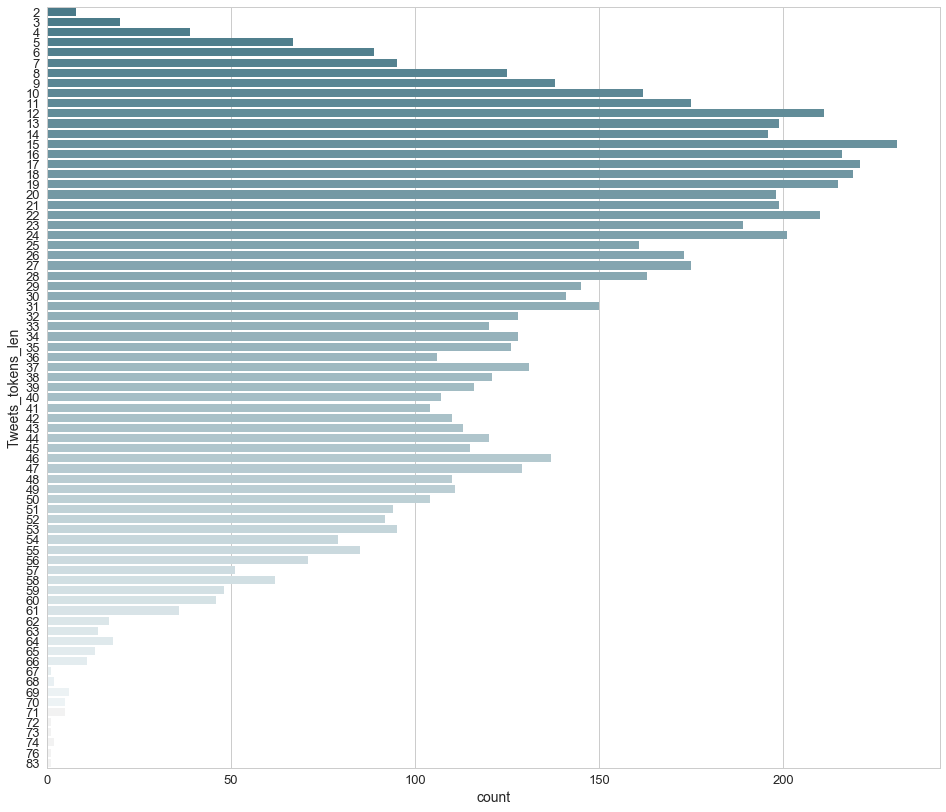

In [14]:
def get_sub_plot_hor(width = 16, height = 14, label_font_size = 14, tick_font_size = 13):
    fig, ax = plt.subplots()
    fig.set_size_inches(width, height)
    ax.tick_params(labelsize = tick_font_size)
    ax.set_xlabel(ax.get_xlabel(), fontsize = label_font_size)
    ax.set_ylabel(ax.get_ylabel(), fontsize = label_font_size)
    return ax

def plot_count_plot(x, df):
    ax = get_sub_plot_hor()
    sns.countplot(y = x, data = df, ax = ax)
    plt.show()
    
plot_count_plot('Tweets_tokens_len', df)

** Most of the tweets have about 12 ~ 24 tokens.**

## Follow-up Questions:
1. Usually how many words (instead of just tokens) are there in a tweets?
2. Can we use bag-of-words to identify topic of the tweets?
3. Are there a lot of stop words in tweets?

### Follow-up Question 1: Usually how many words (instead of just tokens) are there in a tweets?

** When using word_tokenize, there are many special characters in the tokens. Let's remove them:**

In [15]:
def remove_spetical_chars(tokens):
    return [t for t in tokens if t.isalpha()]
    
df['Tweets_tokens_remove_special_chars'] = df['Tweets_tokens'].apply(remove_spetical_chars)
df['Tweets_tokens_remove_special_chars_len'] = df['Tweets_tokens_remove_special_chars'].apply(len)
df.head(2)

,Tweets,Has_predefined_movies,Tweets_tokens,Tweets_tokens_len,Tweets_tokens_remove_special_chars,Tweets_tokens_remove_special_chars_len
299,Come. To. Mama. Own #Oceans8 on Blu-ray™ tomorrow.,[oceans8],"[Come, ., To, ., Mama, ., Own, #, Oceans8, on, Blu-ray™, tomorrow, .]",13,"[Come, To, Mama, Own, on, tomorrow]",6
354,A true story heist movie about dumb guys who watched too many heist movies. A really good movie. Recommended. American Animals. 7.8 / 10@FilmCerita @CenayangFilm,[americananimals],"[A, true, story, heist, movie, about, dumb, guys, who, watched, too, many, heist, movies, ., A, really, good, movie, ., Recommended, ., American, Animals, ., 7.8, /, 10, @, FilmCerita, @, CenayangFilm]",32,"[A, true, story, heist, movie, about, dumb, guys, who, watched, too, many, heist, movies, A, really, good, movie, Recommended, American, Animals, FilmCerita, CenayangFilm]",23


** Yes looks like all the special characters are removed. Let's plot again.**

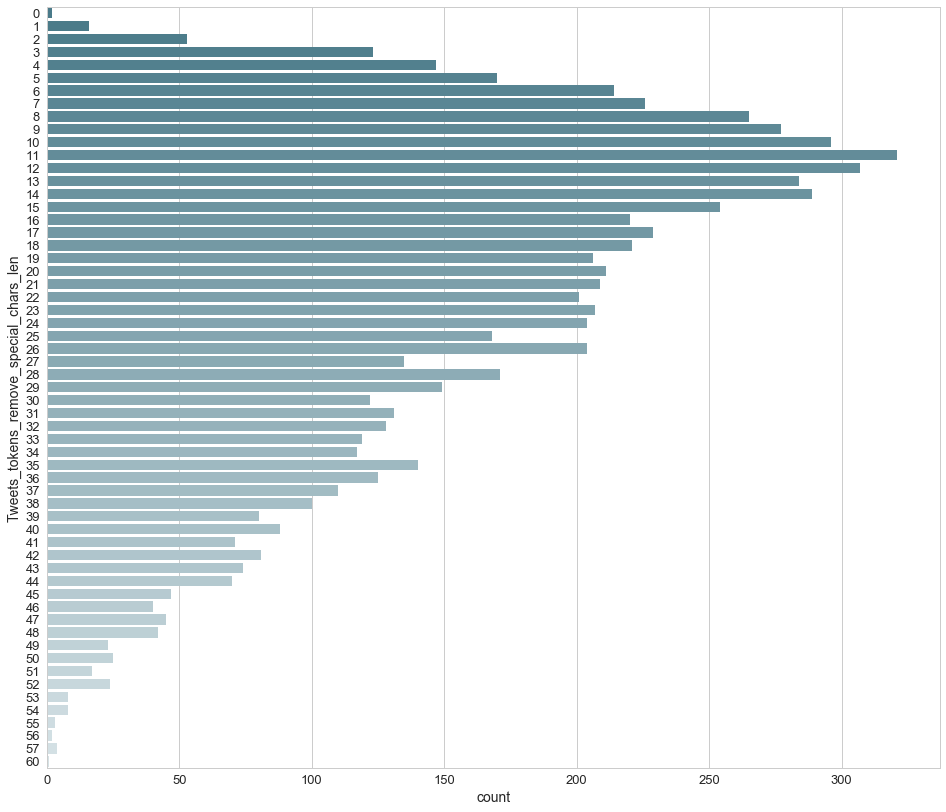

In [16]:
plot_count_plot('Tweets_tokens_remove_special_chars_len', df)

** Most of the tweets have about 8 ~ 15 words.**

### Follow-up Question 2: Can we use bag-of-words to identify topic of the tweets?

In [17]:
def get_most_common(tokens):
    counter = Counter(tokens)
    return counter.most_common(1)

df['Tweets_tokens_counter'] = df['Tweets_tokens_remove_special_chars'].apply(Counter)
df['Tweets_tokens_counter_most_common'] = df['Tweets_tokens_counter'].apply(get_most_common)
df.head(2)

,Tweets,Has_predefined_movies,Tweets_tokens,Tweets_tokens_len,Tweets_tokens_remove_special_chars,Tweets_tokens_remove_special_chars_len,Tweets_tokens_counter,Tweets_tokens_counter_most_common
299,Come. To. Mama. Own #Oceans8 on Blu-ray™ tomorrow.,[oceans8],"[Come, ., To, ., Mama, ., Own, #, Oceans8, on, Blu-ray™, tomorrow, .]",13,"[Come, To, Mama, Own, on, tomorrow]",6,"{'Come': 1, 'To': 1, 'Mama': 1, 'Own': 1, 'on': 1, 'tomorrow': 1}","[(Come, 1)]"
354,A true story heist movie about dumb guys who watched too many heist movies. A really good movie. Recommended. American Animals. 7.8 / 10@FilmCerita @CenayangFilm,[americananimals],"[A, true, story, heist, movie, about, dumb, guys, who, watched, too, many, heist, movies, ., A, really, good, movie, ., Recommended, ., American, Animals, ., 7.8, /, 10, @, FilmCerita, @, CenayangFilm]",32,"[A, true, story, heist, movie, about, dumb, guys, who, watched, too, many, heist, movies, A, really, good, movie, Recommended, American, Animals, FilmCerita, CenayangFilm]",23,"{'A': 2, 'true': 1, 'story': 1, 'heist': 2, 'movie': 2, 'about': 1, 'dumb': 1, 'guys': 1, 'who': 1, 'watched': 1, 'too': 1, 'many': 1, 'movies': 1, 'really': 1, 'good': 1, 'Recommended': 1, 'American': 1, 'Animals': 1, 'FilmCerita': 1, 'CenayangFilm': 1}","[(A, 2)]"


** Looks like these words are mostly stop words.**

### Follow-up Question 3: Are there a lot of stop words in tweets?

** Yes there are a lot of stop words as we saw in follow-up question 2. Let's remove them.**

In [18]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/Nicole/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [19]:
from nltk.corpus import stopwords

def remove_stop_words(tokens):
    return [t for t in tokens if t not in stopwords.words('english')]

df['Tweets_tokens_remove_special_chars_remove_stop_words'] = df['Tweets_tokens_remove_special_chars'].apply(remove_stop_words)
df['Tweets_tokens_remove_special_chars_remove_stop_words_len'] = df['Tweets_tokens_remove_special_chars_remove_stop_words'].apply(len)
df.head(2)

,Tweets,Has_predefined_movies,Tweets_tokens,Tweets_tokens_len,Tweets_tokens_remove_special_chars,Tweets_tokens_remove_special_chars_len,Tweets_tokens_counter,Tweets_tokens_counter_most_common,Tweets_tokens_remove_special_chars_remove_stop_words,Tweets_tokens_remove_special_chars_remove_stop_words_len
299,Come. To. Mama. Own #Oceans8 on Blu-ray™ tomorrow.,[oceans8],"[Come, ., To, ., Mama, ., Own, #, Oceans8, on, Blu-ray™, tomorrow, .]",13,"[Come, To, Mama, Own, on, tomorrow]",6,"{'Come': 1, 'To': 1, 'Mama': 1, 'Own': 1, 'on': 1, 'tomorrow': 1}","[(Come, 1)]","[Come, To, Mama, Own, tomorrow]",5
354,A true story heist movie about dumb guys who watched too many heist movies. A really good movie. Recommended. American Animals. 7.8 / 10@FilmCerita @CenayangFilm,[americananimals],"[A, true, story, heist, movie, about, dumb, guys, who, watched, too, many, heist, movies, ., A, really, good, movie, ., Recommended, ., American, Animals, ., 7.8, /, 10, @, FilmCerita, @, CenayangFilm]",32,"[A, true, story, heist, movie, about, dumb, guys, who, watched, too, many, heist, movies, A, really, good, movie, Recommended, American, Animals, FilmCerita, CenayangFilm]",23,"{'A': 2, 'true': 1, 'story': 1, 'heist': 2, 'movie': 2, 'about': 1, 'dumb': 1, 'guys': 1, 'who': 1, 'watched': 1, 'too': 1, 'many': 1, 'movies': 1, 'really': 1, 'good': 1, 'Recommended': 1, 'American': 1, 'Animals': 1, 'FilmCerita': 1, 'CenayangFilm': 1}","[(A, 2)]","[A, true, story, heist, movie, dumb, guys, watched, many, heist, movies, A, really, good, movie, Recommended, American, Animals, FilmCerita, CenayangFilm]",20


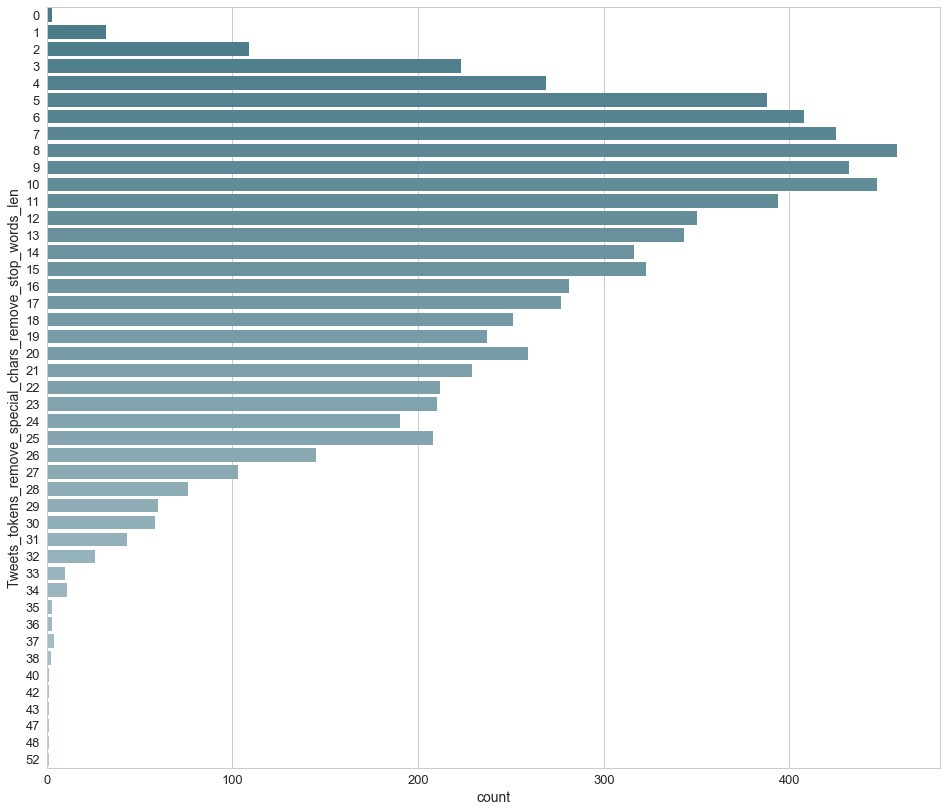

In [20]:
plot_count_plot('Tweets_tokens_remove_special_chars_remove_stop_words_len', df)

**After removing stop words, most of the tweets have about 4 ~ 11 useful words.**

### Minor Follow-up Question: Let's apply bag-of-words again on the tokens without stop words.

In [21]:
df['Tweets_tokens_remove_special_chars_remove_stop_words_counter'] = df['Tweets_tokens_remove_special_chars_remove_stop_words'].apply(Counter)
df['Tweets_tokens_remove_special_chars_remove_stop_words_counter_most_common'] = df['Tweets_tokens_remove_special_chars_remove_stop_words'].apply(get_most_common)
df.head(5)

,Tweets,Has_predefined_movies,Tweets_tokens,Tweets_tokens_len,Tweets_tokens_remove_special_chars,Tweets_tokens_remove_special_chars_len,Tweets_tokens_counter,Tweets_tokens_counter_most_common,Tweets_tokens_remove_special_chars_remove_stop_words,Tweets_tokens_remove_special_chars_remove_stop_words_len,Tweets_tokens_remove_special_chars_remove_stop_words_counter,Tweets_tokens_remove_special_chars_remove_stop_words_counter_most_common
299,Come. To. Mama. Own #Oceans8 on Blu-ray™ tomorrow.,[oceans8],"[Come, ., To, ., Mama, ., Own, #, Oceans8, on, Blu-ray™, tomorrow, .]",13,"[Come, To, Mama, Own, on, tomorrow]",6,"{'Come': 1, 'To': 1, 'Mama': 1, 'Own': 1, 'on': 1, 'tomorrow': 1}","[(Come, 1)]","[Come, To, Mama, Own, tomorrow]",5,"{'Come': 1, 'To': 1, 'Mama': 1, 'Own': 1, 'tomorrow': 1}","[(Come, 1)]"
354,A true story heist movie about dumb guys who watched too many heist movies. A really good movie. Recommended. American Animals. 7.8 / 10@FilmCerita @CenayangFilm,[americananimals],"[A, true, story, heist, movie, about, dumb, guys, who, watched, too, many, heist, movies, ., A, really, good, movie, ., Recommended, ., American, Animals, ., 7.8, /, 10, @, FilmCerita, @, CenayangFilm]",32,"[A, true, story, heist, movie, about, dumb, guys, who, watched, too, many, heist, movies, A, really, good, movie, Recommended, American, Animals, FilmCerita, CenayangFilm]",23,"{'A': 2, 'true': 1, 'story': 1, 'heist': 2, 'movie': 2, 'about': 1, 'dumb': 1, 'guys': 1, 'who': 1, 'watched': 1, 'too': 1, 'many': 1, 'movies': 1, 'really': 1, 'good': 1, 'Recommended': 1, 'American': 1, 'Animals': 1, 'FilmCerita': 1, 'CenayangFilm': 1}","[(A, 2)]","[A, true, story, heist, movie, dumb, guys, watched, many, heist, movies, A, really, good, movie, Recommended, American, Animals, FilmCerita, CenayangFilm]",20,"{'A': 2, 'true': 1, 'story': 1, 'heist': 2, 'movie': 2, 'dumb': 1, 'guys': 1, 'watched': 1, 'many': 1, 'movies': 1, 'really': 1, 'good': 1, 'Recommended': 1, 'American': 1, 'Animals': 1, 'FilmCerita': 1, 'CenayangFilm': 1}","[(A, 2)]"
542,#NowWatching 2018 movie no.81: #AmericanAnimalsSeen it? Leave a #review to be read on the #podcast!Past eps:#FilmTwitter #PodernFamily #ThePWA #PodSociety #MovieReview,[americananimals],"[#, NowWatching, 2018, movie, no.81, :, #, AmericanAnimalsSeen, it, ?, Leave, a, #, review, to, be, read, on, the, #, podcast, !, Past, eps, :, #, FilmTwitter, #, PodernFamily, #, ThePWA, #, PodSociety, #, MovieReview]",35,"[NowWatching, movie, AmericanAnimalsSeen, it, Leave, a, review, to, be, read, on, the, podcast, Past, eps, FilmTwitter, PodernFamily, ThePWA, PodSociety, MovieReview]",20,"{'NowWatching': 1, 'movie': 1, 'AmericanAnimalsSeen': 1, 'it': 1, 'Leave': 1, 'a': 1, 'review': 1, 'to': 1, 'be': 1, 'read': 1, 'on': 1, 'the': 1, 'podcast': 1, 'Past': 1, 'eps': 1, 'FilmTwitter': 1, 'PodernFamily': 1, 'ThePWA': 1, 'PodSociety': 1, 'MovieReview': 1}","[(NowWatching, 1)]","[NowWatching, movie, AmericanAnimalsSeen, Leave, review, read, podcast, Past, eps, FilmTwitter, PodernFamily, ThePWA, PodSociety, MovieReview]",14,"{'NowWatching': 1, 'movie': 1, 'AmericanAnimalsSeen': 1, 'Leave': 1, 'review': 1, 'read': 1, 'podcast': 1, 'Past': 1, 'eps': 1, 'FilmTwitter': 1, 'PodernFamily': 1, 'ThePWA': 1, 'PodSociety': 1, 'MovieReview': 1}","[(NowWatching, 1)]"
576,My ranking of the Jurassic Park/World movies:1: All of them because I am a Jurassic fan and I'm not petty. They're movies people. #JurassicWorld #JurassicPark,[jurassicworld],"[My, ranking, of, the, Jurassic, Park/World, movies:1, :, All, of, them, because, I, am, a, Jurassic, fan, and, I, 'm, not, petty, ., They, 're, movies, people, ., #, JurassicWorld, #, JurassicPark]",32,"[My, ranking, of, the, Jurassic, All, of, them, because, I, am, a, Jurassic, fan, and, I, not, petty, They, movies, people, JurassicWorld, JurassicPark]",23,"{'My': 1, 'ranking': 1, 'of': 2, 'the': 1, 'Jurassic': 2, 'All': 1, 'them': 1, 'because': 1, 'I': 2, 'am': 1, 'a': 1, 'fan': 1, 'and': 1, 'not': 1, 'petty': 1,

**Yes after removing stop words, the most common words in some tweets seem to be more useful for identifying topic.**

### Minor Follow-up Question: Can TF-IDF perform better than bag-of-words for identifying topics?

In [22]:
from gensim.corpora.dictionary import Dictionary

tokenized_docs = [row for row in df['Tweets_tokens_remove_special_chars_remove_stop_words']]
dictionary = Dictionary(tokenized_docs)
print(dictionary)

Dictionary(19696 unique tokens: ['Come', 'Mama', 'Own', 'To', 'tomorrow']...)


In [23]:
corpus = [dictionary.doc2bow(doc) for doc in tokenized_docs]
print(corpus[0])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1)]


In [24]:
from gensim.models.tfidfmodel import TfidfModel

tfidf = TfidfModel(corpus)

In [25]:
TF_IDF_scores = []

for doc in corpus:
    word2score = {}
    for id, score in tfidf[doc]:
        word2score[dictionary.get(id)] = score
    TF_IDF_scores.append(word2score)
    
print(TF_IDF_scores[0])

{'Come': 0.45089216022252143, 'Mama': 0.57311250960438098, 'Own': 0.46509793495470519, 'To': 0.34535131859831941, 'tomorrow': 0.3642179139308051}


In [26]:
df['TF_IDF_score'] = TF_IDF_scores
df.head(2)

,Tweets,Has_predefined_movies,Tweets_tokens,Tweets_tokens_len,Tweets_tokens_remove_special_chars,Tweets_tokens_remove_special_chars_len,Tweets_tokens_counter,Tweets_tokens_counter_most_common,Tweets_tokens_remove_special_chars_remove_stop_words,Tweets_tokens_remove_special_chars_remove_stop_words_len,Tweets_tokens_remove_special_chars_remove_stop_words_counter,Tweets_tokens_remove_special_chars_remove_stop_words_counter_most_common,TF_IDF_score
299,Come. To. Mama. Own #Oceans8 on Blu-ray™ tomorrow.,[oceans8],"[Come, ., To, ., Mama, ., Own, #, Oceans8, on, Blu-ray™, tomorrow, .]",13,"[Come, To, Mama, Own, on, tomorrow]",6,"{'Come': 1, 'To': 1, 'Mama': 1, 'Own': 1, 'on': 1, 'tomorrow': 1}","[(Come, 1)]","[Come, To, Mama, Own, tomorrow]",5,"{'Come': 1, 'To': 1, 'Mama': 1, 'Own': 1, 'tomorrow': 1}","[(Come, 1)]","{'Come': 0.450892160223, 'Mama': 0.573112509604, 'Own': 0.465097934955, 'To': 0.345351318598, 'tomorrow': 0.364217913931}"
354,A true story heist movie about dumb guys who watched too many heist movies. A really good movie. Recommended. American Animals. 7.8 / 10@FilmCerita @CenayangFilm,[americananimals],"[A, true, story, heist, movie, about, dumb, guys, who, watched, too, many, heist, movies, ., A, really, good, movie, ., Recommended, ., American, Animals, ., 7.8, /, 10, @, FilmCerita, @, CenayangFilm]",32,"[A, true, story, heist, movie, about, dumb, guys, who, watched, too, many, heist, movies, A, really, good, movie, Recommended, American, Animals, FilmCerita, CenayangFilm]",23,"{'A': 2, 'true': 1, 'story': 1, 'heist': 2, 'movie': 2, 'about': 1, 'dumb': 1, 'guys': 1, 'who': 1, 'watched': 1, 'too': 1, 'many': 1, 'movies': 1, 'really': 1, 'good': 1, 'Recommended': 1, 'American': 1, 'Animals': 1, 'FilmCerita': 1, 'CenayangFilm': 1}","[(A, 2)]","[A, true, story, heist, movie, dumb, guys, watched, many, heist, movies, A, really, good, movie, Recommended, American, Animals, FilmCerita, CenayangFilm]",20,"{'A': 2, 'true': 1, 'story': 1, 'heist': 2, 'movie': 2, 'dumb': 1, 'guys': 1, 'watched': 1, 'many': 1, 'movies': 1, 'really': 1, 'good': 1, 'Recommended': 1, 'American': 1, 'Animals': 1, 'FilmCerita': 1, 'CenayangFilm': 1}","[(A, 2)]","{'A': 0.273585282961, 'American': 0.150441236264, 'Animals': 0.163959190807, 'CenayangFilm': 0.341233347594, 'FilmCerita': 0.341233347594, 'Recommended': 0.341233347594, 'dumb': 0.31263923053, 'good': 0.159950934443, 'guys': 0.205271537731, 'heist': 0.348894015414, 'many': 0.180685677031, 'movie': 0.208904037624, 'movies': 0.150441236264, 'really': 0.17372955326, 'story': 0.173024363594, 'true': 0.212792774323, 'watched': 0.186556589921}"


In [27]:
def find_highest_scores_word(d):
    for key, value in sorted(d.items(), key=lambda x: x[1], reverse=True):
        return {key: value}
    
df['TF_IDF_score_highest'] = df['TF_IDF_score'].apply(find_highest_scores_word)
df.head(2)

,Tweets,Has_predefined_movies,Tweets_tokens,Tweets_tokens_len,Tweets_tokens_remove_special_chars,Tweets_tokens_remove_special_chars_len,Tweets_tokens_counter,Tweets_tokens_counter_most_common,Tweets_tokens_remove_special_chars_remove_stop_words,Tweets_tokens_remove_special_chars_remove_stop_words_len,Tweets_tokens_remove_special_chars_remove_stop_words_counter,Tweets_tokens_remove_special_chars_remove_stop_words_counter_most_common,TF_IDF_score,TF_IDF_score_highest
299,Come. To. Mama. Own #Oceans8 on Blu-ray™ tomorrow.,[oceans8],"[Come, ., To, ., Mama, ., Own, #, Oceans8, on, Blu-ray™, tomorrow, .]",13,"[Come, To, Mama, Own, on, tomorrow]",6,"{'Come': 1, 'To': 1, 'Mama': 1, 'Own': 1, 'on': 1, 'tomorrow': 1}","[(Come, 1)]","[Come, To, Mama, Own, tomorrow]",5,"{'Come': 1, 'To': 1, 'Mama': 1, 'Own': 1, 'tomorrow': 1}","[(Come, 1)]","{'Come': 0.450892160223, 'Mama': 0.573112509604, 'Own': 0.465097934955, 'To': 0.345351318598, 'tomorrow': 0.364217913931}",{'Mama': 0.573112509604}
354,A true story heist movie about dumb guys who watched too many heist movies. A really good movie. Recommended. American Animals. 7.8 / 10@FilmCerita @CenayangFilm,[americananimals],"[A, true, story, heist, movie, about, dumb, guys, who, watched, too, many, heist, movies, ., A, really, good, movie, ., Recommended, ., American, Animals, ., 7.8, /, 10, @, FilmCerita, @, CenayangFilm]",32,"[A, true, story, heist, movie, about, dumb, guys, who, watched, too, many, heist, movies, A, really, good, movie, Recommended, American, Animals, FilmCerita, CenayangFilm]",23,"{'A': 2, 'true': 1, 'story': 1, 'heist': 2, 'movie': 2, 'about': 1, 'dumb': 1, 'guys': 1, 'who': 1, 'watched': 1, 'too': 1, 'many': 1, 'movies': 1, 'really': 1, 'good': 1, 'Recommended': 1, 'American': 1, 'Animals': 1, 'FilmCerita': 1, 'CenayangFilm': 1}","[(A, 2)]","[A, true, story, heist, movie, dumb, guys, watched, many, heist, movies, A, really, good, movie, Recommended, American, Animals, FilmCerita, CenayangFilm]",20,"{'A': 2, 'true': 1, 'story': 1, 'heist': 2, 'movie': 2, 'dumb': 1, 'guys': 1, 'watched': 1, 'many': 1, 'movies': 1, 'really': 1, 'good': 1, 'Recommended': 1, 'American': 1, 'Animals': 1, 'FilmCerita': 1, 'CenayangFilm': 1}","[(A, 2)]","{'A': 0.273585282961, 'American': 0.150441236264, 'Animals': 0.163959190807, 'CenayangFilm': 0.341233347594, 'FilmCerita': 0.341233347594, 'Recommended': 0.341233347594, 'dumb': 0.31263923053, 'good': 0.159950934443, 'guys': 0.205271537731, 'heist': 0.348894015414, 'many': 0.180685677031, 'movie': 0.208904037624, 'movies': 0.150441236264, 'really': 0.17372955326, 'story': 0.173024363594, 'true': 0.212792774323, 'watched': 0.186556589921}",{'heist': 0.348894015414}


In [28]:
# Let's compare bag-of-words vs. TF-IDF:
df[['Tweets_tokens_remove_special_chars_remove_stop_words_counter_most_common', 'TF_IDF_score_highest']].head(50)

,Tweets_tokens_remove_special_chars_remove_stop_words_counter_most_common,TF_IDF_score_highest
299,"[(Come, 1)]",{'Mama': 0.573112509604}
354,"[(A, 2)]",{'heist': 0.348894015414}
542,"[(NowWatching, 1)]",{'AmericanAnimalsSeen': 0.345633915675}
576,"[(Jurassic, 2)]",{'petty': 0.449430002025}
686,"[(crazy, 1)]",{'chan': 0.288310703615}
996,"[(CrazyRichAsians, 1)]",{'joy': 0.532049376718}
1242,"[(Seeing, 1)]",{'BFF': 0.72307343948}
1297,"[(Just, 1)]",{'JP': 0.360110974903}
1341,"[(Game, 1)]",{'TheFemaleMovieStar': 0.373174022359}
1349,"[(Don, 1)]",{'capturing': 0.601841918412}


In [29]:
df[['Tweets_tokens_remove_special_chars_remove_stop_words_counter_most_common', 'TF_IDF_score_highest']].tail(50)

,Tweets_tokens_remove_special_chars_remove_stop_words_counter_most_common,TF_IDF_score_highest
13980,"[(Give, 1)]",{'ANYTHING': 0.34505264605}
14003,"[(Since, 1)]",{'obligated': 0.404993364049}
14050,"[(UPCOMING, 1)]",{'EPISODES': 0.343537248986}
14068,"[(love, 2)]",{'mcu': 0.508751490547}
14082,"[(nothing, 1)]",{'arejanuary': 0.25310298489}
14099,"[(like, 1)]",{'aged': 0.276392433511}
14131,"[(I, 2)]",{'Mía': 0.385610642356}
14142,"[(movies, 2)]",{'Feminine': 0.273933225729}
14146,"[(MerylStreep, 2)]",{'MerylStreep': 0.431491360995}
14149,"[(Looking, 1)]",{'BlanchettAHSJulianne': 0.232024967842}


**It seems that w/ TF-IDF it can at least generate more meaningful topic than bag-of-words.**

In [30]:
# Save dataframe for later
df.to_csv('../Data/tweets_eda.csv', index = False)

## Conclusion

1. In this notebook, we identify useful tweets using predefined keywords.
2. We check which movies occur most in tweets. The most common two are Jurassic World & Crazy Rich Asians.
3. We also analyze length of a tweets. After removing unwanted tokens & stop words, most of the tweets have about 4 ~ 11 useful words.
4. We tried to identify topic using both bad-of-words & TF-IDF. Looks like TD-IDF can at least generate more meaningful topic than bag-of-words.